In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score



%matplotlib inline

data = pd.read_csv('/home/monica/data/kc_house_data.csv')

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
None


In [2]:
print(data['date'].unique())

['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000' '20140528T000000'
 '20141007T000000' '20150124T000000' '20140731T000000' '20140529T000000'
 '20141205T000000' '20150424T000000' '20140514T000000' '20140826T000000'
 '20140703T000000' '20140516T000000' '20141120T000000' '20141103T000000'
 '20140626T000000' '20141201T000000' '20140624T000000' '20150302T000000'
 '20141110T000000' '20141203T000000' '20140613T000000' '20141230T000000'
 '20150213T000000' '20140620T000000' '20140715T000000' '20140811T000000'
 '20140707T000000' '20141028T000000' '20140729T000000' '20140718T000000'
 '20150325T000000' '20140716T000000' '20150428T000000' '20150311T000000'
 '20140916T000000' '20150217T000000' '20141231T000000' '20150205T000000'
 '20150303T000000' '20140819T000000' '20150407T000000' '20140827T000000'
 '20150223T000000' '20141210T000000' '20140828T0000

In [3]:
X = data[['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
         'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
         'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y = data['price']

In [4]:
data[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].corr()

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
sqft_living,1.000000,0.172826,0.756420,0.183286
sqft_lot,0.172826,1.000000,0.144608,0.718557
sqft_living15,0.756420,0.144608,1.000000,0.183192
sqft_lot15,0.183286,0.718557,0.183192,1.000000


In [5]:
X = X.drop(['sqft_living15', 'sqft_lot15'], axis=1) #Removing these 2 columns as they are highly correlated with sqt_living, sqt_lot

In [6]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
dtypes: float64(4), int64(12)
memory usage: 2.6 MB
None


In [7]:
print(len(list(data['zipcode'].unique())))

70


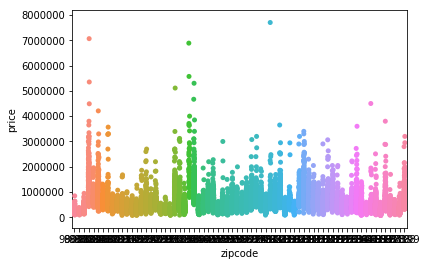

In [8]:
sns.stripplot(x="zipcode", y="price", data=data) 

In [9]:
X = X.drop(['lat', 'long'], axis=1) #Remove these columns as we have zipcode

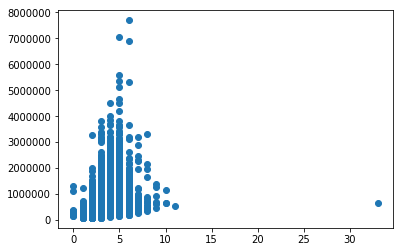

In [10]:
plt.scatter(data['bedrooms'], data['price']) #Not a linear relationship

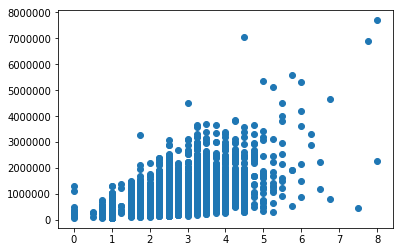

In [11]:
plt.scatter(data['bathrooms'], data['price'])

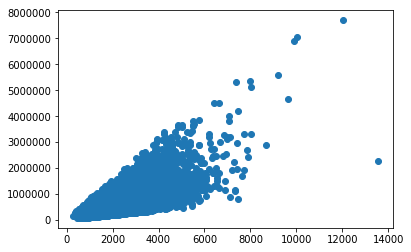

In [12]:
plt.scatter(data['sqft_living'], data['price']) #Definitely linear

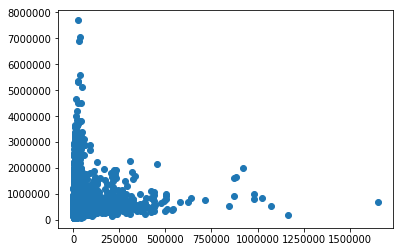

In [13]:
plt.scatter(data['sqft_lot'], data['price']) #not so linear

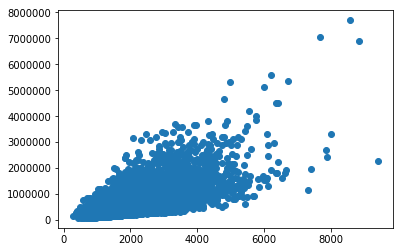

In [14]:
plt.scatter(data['sqft_above'], data['price']) #Linear

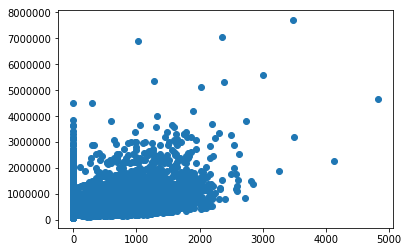

In [15]:
plt.scatter(data['sqft_basement'], data['price']) #not so linear

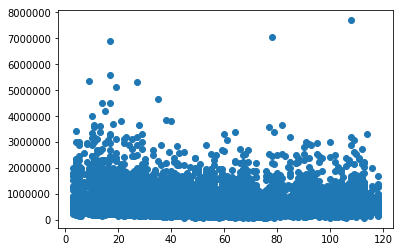

In [16]:


data['year_built_ago']  = 2018 - data['yr_built']
plt.scatter(data['year_built_ago'], data['price'])

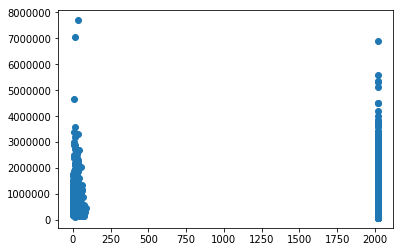

In [17]:
data['year_renovated_ago'] = 2018 - data['yr_renovated']
plt.scatter(data['year_renovated_ago'], data['price'])

2018
False
False


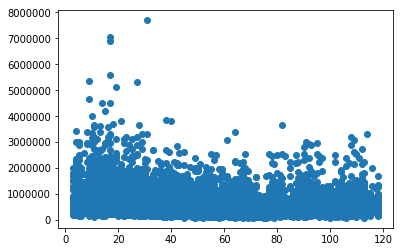

In [18]:

print(data['year_renovated_ago'].max())
print(data['yr_built'].isnull().values.any())
print(data['yr_renovated'].isnull().values.any())

def get_years_ago(yr_built, yr_renovated):
    yr_later = max(yr_built, yr_renovated)
    return (2018 - yr_later)


data['year_worked_ago'] = data[['yr_built','yr_renovated']].apply(lambda x: get_years_ago(x['yr_built'], x['yr_renovated']), axis=1)
#data['year_worked_ago'] = (max(data['yr_built'], data['yr_renovated']))
plt.scatter(data['year_worked_ago'], data['price'])

In [19]:
#X['log_yr_ago'] = np.log(X['log_yr_ago'])
#plt.scatter(np.log(X['yr_ago']), data['price'])

In [20]:
#X = X.drop(['yr_built', 'yr_renovated'], axis=1)
#X['yr_ago'] = data['year_worked_ago']
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
dtypes: float64(2), int64(12)
memory usage: 2.3 MB
None


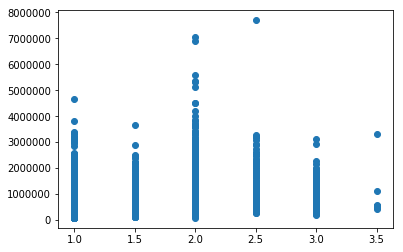

In [21]:
plt.scatter(data['floors'], data['price'])

In [22]:
print(data['view'].unique())
print(data['condition'].unique())
print(data['grade'].unique())

[0 3 4 2 1]
[3 5 4 1 2]
[ 7  6  8 11  9  5 10 12  4  3 13  1]


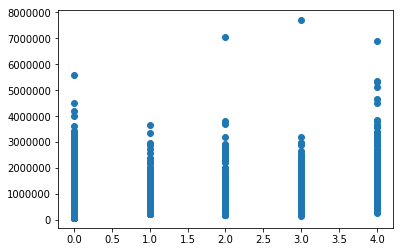

In [23]:
plt.scatter(data['view'], data['price'])

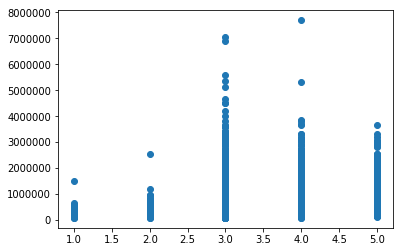

In [24]:
plt.scatter(data['condition'], data['price'])

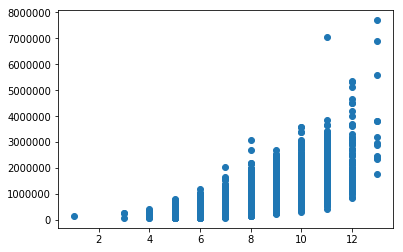

In [25]:
plt.scatter(data['grade'], data['price'])

In [26]:
#At this time, we have 13 columns - bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_ago, floors, waterfront, view, grade, condition, view.

#sqft_living, sqft_above, grade are relatively linear with price - leaving them as is.

#X = X.drop(['yr_built', 'yr_renovated'], axis = 1)

X['floors'] = X['floors'].apply(lambda x: int(x))

X = pd.get_dummies(data=X, columns=['waterfront', 'view', 'condition', 'grade', 'zipcode'])

print(X.skew())

print(X.describe())

bedrooms           1.974300
bathrooms          0.511108
sqft_living        1.471555
sqft_lot          13.060019
floors             0.726178
sqft_above         1.446664
sqft_basement      1.577965
yr_built          -0.469805
yr_renovated       4.549493
waterfront_0     -11.385108
waterfront_1      11.385108
view_0            -2.699187
view_1             7.881854
view_2             4.415059
view_3             6.277585
view_4             8.048374
condition_1       26.786831
condition_2       11.076192
condition_3       -0.625297
condition_4        1.078121
condition_5        3.129351
grade_1          147.013605
grade_3           84.866561
grade_4           27.246656
grade_5            9.291567
grade_6            2.776722
grade_7            0.342802
grade_8            0.975850
grade_9            2.324523
grade_10           4.014560
                    ...    
zipcode_98092      7.655073
zipcode_98102     14.243284
zipcode_98103      5.738921
zipcode_98105      9.560508
zipcode_98106      7

In [27]:

print(X.isnull().sum()[X.isnull().sum() > 0])

print("=========================================")

'''
X['bedrooms'] = np.sqrt(X['bedrooms'])       
X['sqft_living'] = np.sqrt(X['sqft_living'])
X['sqft_lot'] = np.sqrt(X['sqft_lot'])
X['floors'] = np.sqrt(X['floors'])
X['waterfront'] = np.log1p(X['waterfront'])
X['view'] = np.sqrt(X['view'])
X['condition'] = np.sqrt(X['condition'])
X['grade'] = np.sqrt(X['grade'])
X['sqft_above'] = np.sqrt(X['sqft_above'])
X['sqft_basement'] = np.sqrt(X['sqft_basement'])
X['zipcode'] = np.sqrt(X['zipcode'])
X['yr_ago'] = np.sqrt(X['yr_ago'])

print(X.skew())
'''


Series([], dtype: int64)


"\nX['bedrooms'] = np.sqrt(X['bedrooms'])       \nX['sqft_living'] = np.sqrt(X['sqft_living'])\nX['sqft_lot'] = np.sqrt(X['sqft_lot'])\nX['floors'] = np.sqrt(X['floors'])\nX['waterfront'] = np.log1p(X['waterfront'])\nX['view'] = np.sqrt(X['view'])\nX['condition'] = np.sqrt(X['condition'])\nX['grade'] = np.sqrt(X['grade'])\nX['sqft_above'] = np.sqrt(X['sqft_above'])\nX['sqft_basement'] = np.sqrt(X['sqft_basement'])\nX['zipcode'] = np.sqrt(X['zipcode'])\nX['yr_ago'] = np.sqrt(X['yr_ago'])\n\nprint(X.skew())\n"

               bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms       1.000000   0.515884     0.576671  0.031703  0.155643   
bathrooms      0.515884   1.000000     0.754665  0.087740  0.519019   
sqft_living    0.576671   0.754665     1.000000  0.172826  0.353321   
sqft_lot       0.031703   0.087740     0.172826  1.000000 -0.008951   
floors         0.155643   0.519019     0.353321 -0.008951  1.000000   
sqft_above     0.477600   0.685342     0.876597  0.183512  0.517913   
sqft_basement  0.303093   0.283770     0.435043  0.015286 -0.235836   
yr_built       0.154178   0.506019     0.318049  0.053080  0.578619   
yr_renovated   0.018841   0.050739     0.055363  0.007644 -0.007775   
waterfront_0   0.006582  -0.063744    -0.103818 -0.021604 -0.019640   
waterfront_1  -0.006582   0.063744     0.103818  0.021604  0.019640   
view_0        -0.080106  -0.177145    -0.270907 -0.067847 -0.013869   
view_1         0.022200   0.038054     0.066511 -0.008287 -0.020548   
view_2

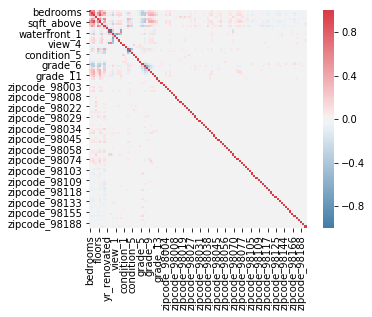

In [28]:
sns.heatmap(X.corr(), mask=np.zeros_like(X.corr(), dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True)

print(X.corr())

In [29]:
X = X.drop(['sqft_above' ], axis=1)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Columns: 102 entries, bedrooms to zipcode_98199
dtypes: float64(1), int64(7), uint8(94)
memory usage: 3.3 MB
None


In [30]:
#Dropping zipcode for now

#X = X.drop('zipcode', axis=1)



In [31]:
x_scaler = StandardScaler()

X = x_scaler.fit_transform(X)

y_scaler = StandardScaler()

y = y.values.reshape(-1,1)

y = y_scaler.fit_transform(y)

In [32]:
#, random_state = 437
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [33]:
model = LinearRegression()

model.fit(X_train, y_train)

print("Model train score: {}".format(model.score(X_train, y_train)))

print("Adjusted R2 {}".format(1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))


print(model.coef_)
      

Model train score: 0.8355393282325221
Adjusted R2 0.8345633005068991
[[-3.53568761e-02  5.09716160e-02  4.30590968e-01  2.04586741e-02
  -4.66880996e-02 -6.85259286e-02 -2.11552377e-02  2.59105115e-02
  -1.88069772e+11 -1.88069772e+11 -1.10099577e+12 -4.54860969e+11
  -7.63109371e+11 -5.61397924e+11 -4.46002796e+11 -7.04916889e+10
  -1.68231813e+11 -9.03561225e+11 -8.33335194e+11 -5.09836568e+11
   4.48883282e+10  7.77452676e+10  2.41574404e+11  6.94394156e+11
   1.92858563e+12  3.25225327e+12  2.96554215e+12  2.15216587e+12
   1.47145455e+12  8.88349131e+11  4.24970329e+11  1.61802230e+11
   2.23679149e+11  1.66478046e+11  1.97099950e+11  2.09536739e+11
   1.53073213e+11  2.61512074e+11  1.40322508e+11  1.98139096e+11
   1.18285639e+11  1.64811797e+11  1.31643820e+11  1.62704092e+11
   1.80377828e+11  2.61768306e+11  1.06504075e+11  2.38346244e+11
   1.98139096e+11  2.10834790e+11  1.88569582e+11  1.95004146e+11
   1.32170501e+11  2.43947648e+11  2.73269673e+11  2.84023897e+11
   8.37

In [34]:
y_predicted = model.predict(X_test)

print("Adjusted R2 for test data {}".format(1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))

Adjusted R2 for test data 0.8286543268684148


In [35]:
newX = pd.DataFrame({"Constant":np.ones(len(X_test))}).join(pd.DataFrame(X_test))
MSE = (sum((y_test-y_predicted)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

params = np.append(model.intercept_,model.coef_)
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)  

     Coefficients  Standard Errors  t values  Probabilites
0   -2.000000e-03              NaN       NaN           NaN
1   -3.540000e-02            0.007    -4.865         0.000
2    5.100000e-02            0.012     4.430         0.000
3    4.306000e-01            0.015    28.074         0.000
4    2.050000e-02            0.008     2.579         0.010
5   -4.670000e-02            0.010    -4.543         0.000
6   -6.850000e-02            0.009    -7.511         0.000
7   -2.120000e-02            0.012    -1.805         0.071
8    2.590000e-02            0.007     3.797         0.000
9   -1.880698e+11              NaN       NaN           NaN
10  -1.880698e+11              NaN       NaN           NaN
11  -1.100996e+12              NaN       NaN           NaN
12  -4.548610e+11              NaN       NaN           NaN
13  -7.631094e+11              NaN       NaN           NaN
14  -5.613979e+11              NaN       NaN           NaN
15  -4.460028e+11              NaN       NaN           N

/home/monica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
